In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
stations = pd.read_json('stations.json.gz', lines=True)
stations.avg_tmax = stations.avg_tmax/10

In [3]:
city = pd.read_csv('city_data.csv').dropna(inplace=False).reset_index(drop=True)

city

,name,population,area,latitude,longitude
0,Calgary,1096833.0,825290000.0,51.054444,-114.066944
1,Edmonton,812201.0,684370000.0,53.500000,-113.500000
2,Abbotsford,133497.0,375550000.0,49.054611,-122.328000
3,Burnaby,223218.0,90610000.0,49.250000,-122.949167
4,Nanaimo,83811.0,91000000.0,49.164167,-123.936389
...,...,...,...,...,...
336,Vista,93834.0,48377000.0,33.193611,-117.241111
337,Renton,90927.0,60970000.0,47.486667,-122.195278
338,San Angelo,93200.0,150900000.0,31.450000,-100.450000
339,San Juan,355074.0,199429084.0,18.450000,-66.066667


In [9]:
city['area'] = city['area']/1000000
city = city[city['area'] < 10000]
city

,name,population,area,latitude,longitude,avg_temp,density
0,Calgary,1096833.0,0.000825,51.054444,-114.066944,20.669231,1329.027372
1,Edmonton,812201.0,0.000684,53.500000,-113.500000,14.056742,1186.786387
2,Abbotsford,133497.0,0.000376,49.054611,-122.328000,21.760969,355.470643
3,Burnaby,223218.0,0.000091,49.250000,-122.949167,17.534521,2463.502925
4,Nanaimo,83811.0,0.000091,49.164167,-123.936389,19.972527,921.000000
...,...,...,...,...,...,...,...
336,Vista,93834.0,0.000048,33.193611,-117.241111,14.721307,1939.640738
337,Renton,90927.0,0.000061,47.486667,-122.195278,17.420219,1491.340003
338,San Angelo,93200.0,0.000151,31.450000,-100.450000,6.303306,617.627568
339,San Juan,355074.0,0.000199,18.450000,-66.066667,13.698087,1780.452444


In [5]:
def distance(city, stations):
    lon1 = city['longitude']
    lat1 = city['latitude']
    lon2 = stations['longitude']
    lat2 = stations['latitude']
    
    diff_lon = lon2-lon1 #calculate difference
    diff_lat = lat2-lat1
    
    r = 6371000
    a = np.sin(diff_lat/2) * np.sin(diff_lat/2)  #formula from wikipedia
    b = np.cos(np.deg2rad(lat1))*np.cos(np.deg2rad(lat2))*np.sin(diff_lon/2)*np.sin(diff_lon/2)
    d = 2*r*np.arcsin(np.sqrt(a+b))
    
    stations['distance'] = d

In [6]:
def best_tmax(city,stations):
    distance(city,stations)
    closest = np.argmin(stations['distance'])
    best_tmax = stations['avg_tmax'][closest]
    return best_tmax

In [7]:
city['avg_temp'] = city.apply(best_tmax, stations = stations, axis = 1)
city['density'] = city['population']/city['area']

/home/jack/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


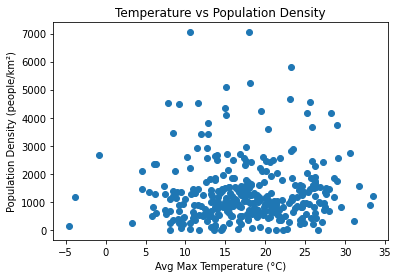

In [8]:
plt.scatter(city['avg_temp'],city['density'])
plt.xlabel('Avg Max Temperature (\u00b0C)')
plt.ylabel('Population Density (people/km\u00b2)')
plt.title('Temperature vs Population Density')
plt.savefig('output.svg')